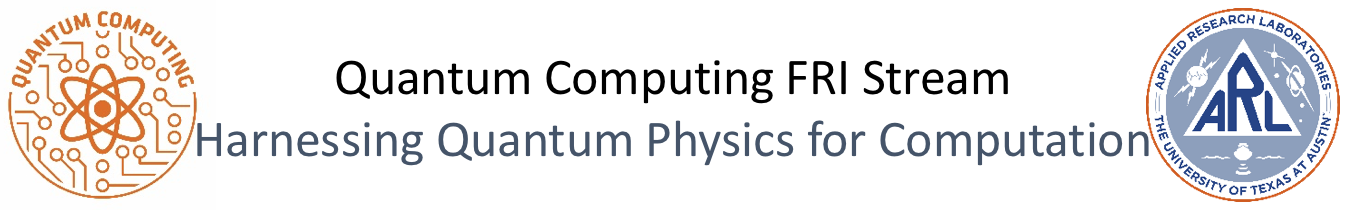

# Quantum Fourier Transform (QFT)
## Lesson 8

### Installations and Imports

In [1]:
%pip install qiskit
%pip install qiskit-aer

#You may need to restart the runtime for this change to take effect
%pip install pylatexenc
%pip install qiskit_ibm_runtime

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.primitives import Sampler, StatevectorSampler, Estimator, StatevectorEstimator
import numpy as np

sampler = StatevectorSampler()
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Today's Objectives

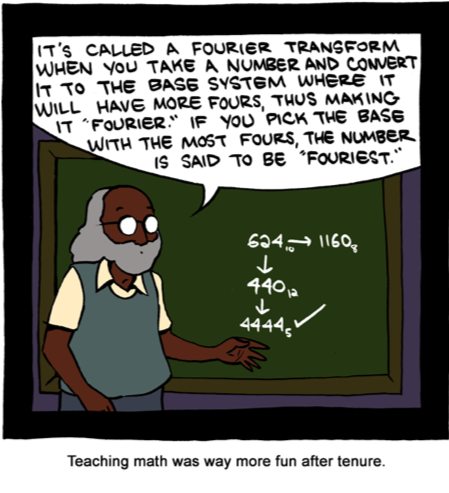

 - Discuss the workings of the discrete Fourier transform (DFT) and quantum Fourier transform (QFT)
 - Explain the differences between them
 - Compute the QFT of a given qubit register

## Signals

A periodic signal may be decomposed into a sum of constituent frequencies.

$$ s(t) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} a_{n} \cos \left( \frac{2\pi n  t}{T}\right) + \sum_{n=1}^{\infty} b_{n} \sin \left( \frac{2\pi n  t}{T}\right)$$

Series like this have been $``\text{discovered"}$ by various mathemeticians and scientists throughout history.

You can think of the constituent cosine and sine terms similarly to the way we can express an arbitrary vector as a combinations of basis vectors.

### Fourier Transform

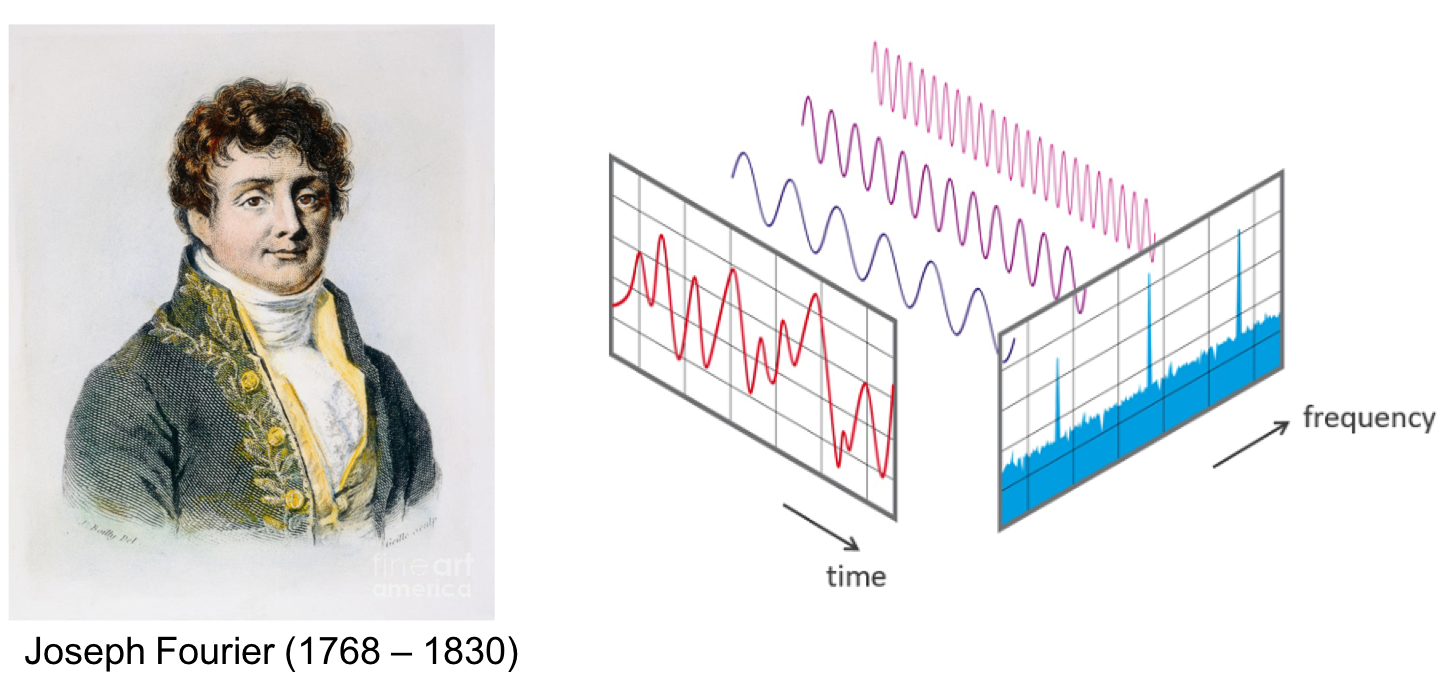

The actual Fourier transform and its pair, the inverse Fourier transform, can be expressed as the following integrals.

$$\widehat{s} (f) = \int_{-\infty}^{\infty}{s}(t)e^{-i 2\pi t f}dt \qquad\qquad s(t) = \int_{-\infty}^{\infty}\widehat{s} (f)e^{i 2\pi t f}df$$

Here, $s(t)$ is a time-dependent function and $\widehat{s}(f)$ is a frequency-dependent function.

<font color=purple> Effectively, the Fourier transform takes a function in one basis and expresses it as a signal in a different basis. The two bases related by a Fourier transform are sometimes known as a Fourier pair or (in physics) conjugate variables. </font>

Taking advantage of the identity $e^{ix}=\cos (x) + i \sin (x)$, we can rewrite the signal as a sum of its constituent frequencies in exponential form:

$$ s(t) = \sum_{n=-\infty}^{\infty} c_{n}e^{i2\pi n t/T} \quad\text{ where }\quad c_{n}=\frac{1}{T} \int_{0}^{T}{s}(t)e^{-i 2\pi n t/T}dt $$

This is beginning to get a bit deep into the math, but don't worry. Rather than deriving and proving these expressions, we just want to have them for reference as we implement the ideas.

### Digital Sampling

$\text{We can approximate our continuous signal }s(t)\text{ by taking its value at some discrete time samples.}\quad\mathbf{s}=\left(s_{0},s_{1},\dots,s_{N-1}\right)$

As you might expect, the particular distribution of the samples is important in faithfully representing the sampled signal.

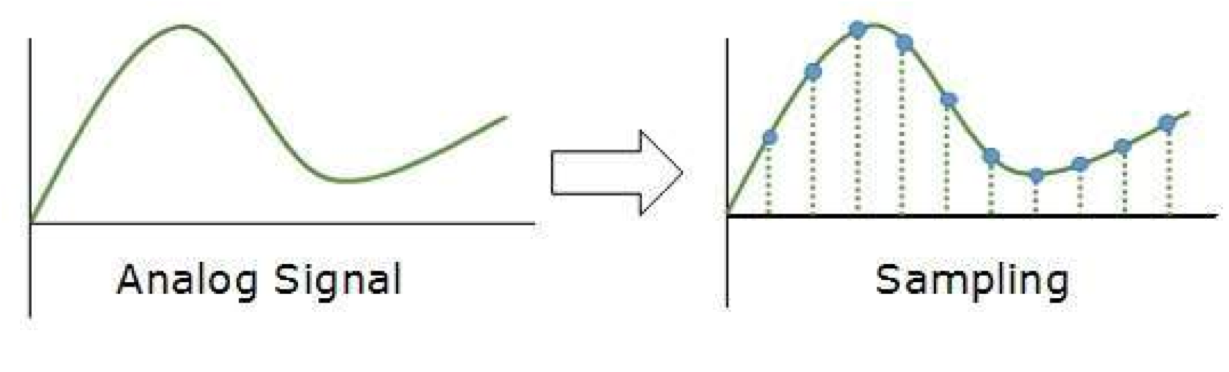

Then we can take the expressions from before and substitute the samples in place of the actual signal.

$$ \boxed{s(t) = \sum_{n=-\infty}^{\infty} c_{n}e^{i2\pi n t/T} \quad\text{ with }\quad c_{n}=\frac{1}{T} \int_{0}^{T}{s}(t)e^{-i 2\pi n t/T}dt \approx \frac{1}{N} \sum_{k=0}^{N-1} e^{-i 2\pi n k/N}s_{k}}$$

## Classical Discrete Fourier Transform (DFT)

$\text{Let }\mathbf{s}=\left( s_{0},s_{1},\dots,s_{N-1}\right) \in \mathbb{C}^{N} \text{ be a vector of complex numbers. }\left( N=2^{n}\right)$

$\text{Then the DFT of }\mathbf{s}\text{ is denoted as the vector }\mathbf{S}=\left( S_{0},S_{1},\dots,S_{N-1}\right)\text{  where*}$

$$\boxed{S_{y} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} e^{i2\pi x y /N} s_{x}}$$

$\color{blue}{\text{*Beware of differing conventions in the definition of the DFT!}}$

It can be shown that the DFT corresponds to a _unitary matrix_.

$$\mathbf{U}_{\text{DFT}}\mathbf{s}=\mathbf{S} \qquad \qquad \mathbf{U}_{\text{DFT}}^{\dagger}=\mathbf{U}_{\text{DFT}}^{-1}$$

### Example

$\text{Compute the matrix }\mathbf{U}_{DFT} \text{ for }N=2.$

We know $\mathbf{U}_{\text{DFT}}$ acts on the vector $\mathbf{s}$ to produce the vector $\mathbf{S}$.

$$\begin{pmatrix} \mathbf{U}_{00} & \mathbf{U}_{01} \\ \mathbf{U}_{10} & \mathbf{U}_{11}  \end{pmatrix} \begin{pmatrix} \mathbf{s}_{0} \\ \mathbf{s}_{1}\end{pmatrix} =  \begin{pmatrix} \mathbf{U}_{00}\mathbf{s}_{0} + \mathbf{U}_{01}\mathbf{s}_{1} \\ \mathbf{U}_{10}\mathbf{s}_{0} + \mathbf{U}_{11}\mathbf{s}_{1}  \end{pmatrix} = \begin{pmatrix} \mathbf{S}_{0} \\ \mathbf{S}_{1}\end{pmatrix}  $$

If we compare this to the boxed expression above, we can see that each component of $\mathbf{U}_{\text{DFT}}$ is given by

$$\left(\mathbf{U}_{\text{DFT}}\right)_{jk}=\frac{1}{\sqrt{N}}e^{i2\pi jk/N}$$

$ $

$$\begin{align}
\left(\mathbf{U}_{\text{DFT}}\right)_{00}=\frac{1}{\sqrt{2}} \quad\qquad &\left(\mathbf{U}_{\text{DFT}}\right)_{01}=\frac{1}{\sqrt{2}} \\ & \\
\left(\mathbf{U}_{\text{DFT}}\right)_{10}=\frac{1}{\sqrt{2}} \quad \qquad &\left(\mathbf{U}_{\text{DFT}}\right)_{11}=\frac{1}{\sqrt{2}}e^{i\pi} = -\frac{1}{\sqrt{2}}
\end{align}
$$


#### Spoiler!

$$\mathbf{U}_{\text{DFT}} = \mathbf{H} \text{ is a Hadamard matrix for }N=2!$$

### Computational Complexity of DFT

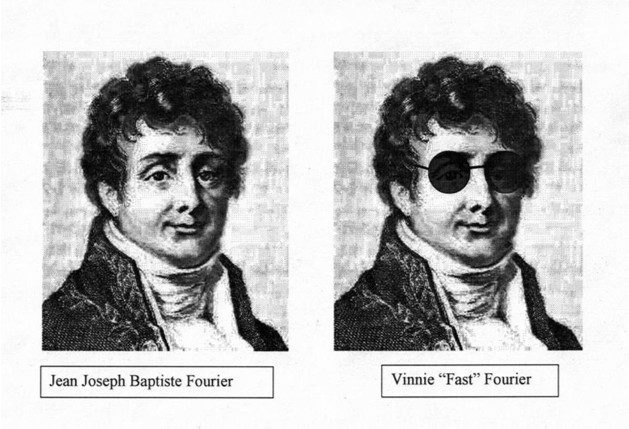

$S_{y} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} e^{i2\pi x y /N} s_{x} \quad\text{ for }y=0,\dots,N-1$

$\text{Simple matrix multiplication requires }\mathcal{O}(N^{2}) \text{ operations.}$

$\text{Using the Cooley-Tukey Fast Fourier Transform takes only }\mathcal{O}(N\log_{2} N) \text{ operations.}$

$\text{A Quantum Fourier Transform requires only }\mathcal{O}((\log_{2} N)^{2}) \text{ operations!}$

## Quantum Fourier Transform (QFT)

Analogously to its classical version, the QFT maps a state from one basis to its counterpart basis - from the computational basis to the quantum Fourier basis.

$\text{Let }\lvert\psi\rangle =\sum_{x=0}^{N-1} \lvert x\rangle\langle x\lvert\psi\rangle \text{ be an }n\text{-qubit quantum state. }(N=2^{n})$

$\text{The Quantum Fourier Transform of }\lvert\psi\rangle\text{ is denoted }\lvert\widetilde\psi\rangle\text{ where }$

$$\boxed{\langle y \lvert\widetilde\psi\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} e^{i2\pi x y /N}\langle x\lvert\psi\rangle }\quad\text{ for }y=0,\dots,N-1$$

It can be shown that the QFT also corresponds to a _unitary operator_.

$$\mathbf{U}_{\text{QFT}}\lvert\psi\rangle=\lvert\widetilde{\psi}\rangle \qquad \qquad \mathbf{U}_{\text{QFT}}^{\dagger}=\mathbf{U}_{\text{QFT}}^{-1}$$

### <font color=green>Exercise 1</font>

We saw above that the single-bit DFT is given by a Hadamard matrix.

Use the boxed equation above to find the QFT of a general, single-qubit state $\lvert \psi\rangle = \alpha \lvert 0\rangle + \beta \lvert 1\rangle$

Calculate the single-qubit QFT matrix.

Write the matrix here:

did the work in notebook, it's a hadamard gate

### Gate Implementation of QFT

$\begin{align}
n=1: \quad &\mathbf{U}_{\text{QFT}}=\mathbf{H}_{0} \\
n=2: \quad &\mathbf{U}_{\text{QFT}}=\mathbf{SWAP}_{01}\mathbf{H}_{0}\mathbf{C}^{\mathbf{R}_{2}}_{01}\mathbf{H}_{1} \\
n=3: \quad &\mathbf{U}_{\text{QFT}}=\mathbf{SWAP}_{02}\mathbf{H}_{0}\mathbf{C}^{\mathbf{R}_{2}}_{01}\mathbf{H}_{1} \mathbf{C}^{\mathbf{R}_{3}}_{02}\mathbf{C}^{\mathbf{R}_{2}}_{12}\mathbf{H}_{2} \\
n=4: \quad &\mathbf{U}_{\text{QFT}}=\mathbf{SWAP}_{12}\mathbf{SWAP}_{03}\mathbf{H}_{0}\mathbf{C}^{\mathbf{R}_{2}}_{01}\mathbf{H}_{1} \mathbf{C}^{\mathbf{R}_{3}}_{02}\mathbf{C}^{\mathbf{R}_{2}}_{12}\mathbf{H}_{2} \mathbf{C}^{\mathbf{R}_{4}}_{03}\mathbf{C}^{\mathbf{R}_{3}}_{13}\mathbf{C}^{\mathbf{R}_{2}}_{23}\mathbf{H}_{3} \\
& \vdots \\
& \qquad \mathbf{R}_{k} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i2\pi/2^{k}} \end{pmatrix} = \texttt{qc.p(}\lambda=2\pi/2^{k}\texttt{,q[target])}=\texttt{qc.rz(}\lambda=2\pi/2^{k}\texttt{,q[target])}= \texttt{qc.u(}0,0,2\pi/2^{k}\texttt{)}
\end{align}$

##### $\text{You can use }\texttt{qc.cp}(\lambda,\texttt{q[control],q[target]})\text{ or }\texttt{qc.crz}(\lambda,\texttt{q[control],q[target]})\text{ for this controlled rotation}.$

In [ ]:
qc=QuantumCircuit(2)

qc.cp(np.pi/4,0,1)

qc.draw('mpl')

### <font color=green>Exercise 2</font>

Using qiskit, complete the following function which takes a quantum circuit with an n-qubit register and computes its QFT.

Do the same for the inverse QFT.

__Hint:__ You may prefer to write the swaps and controlled rotations separately and then combine them into your function.

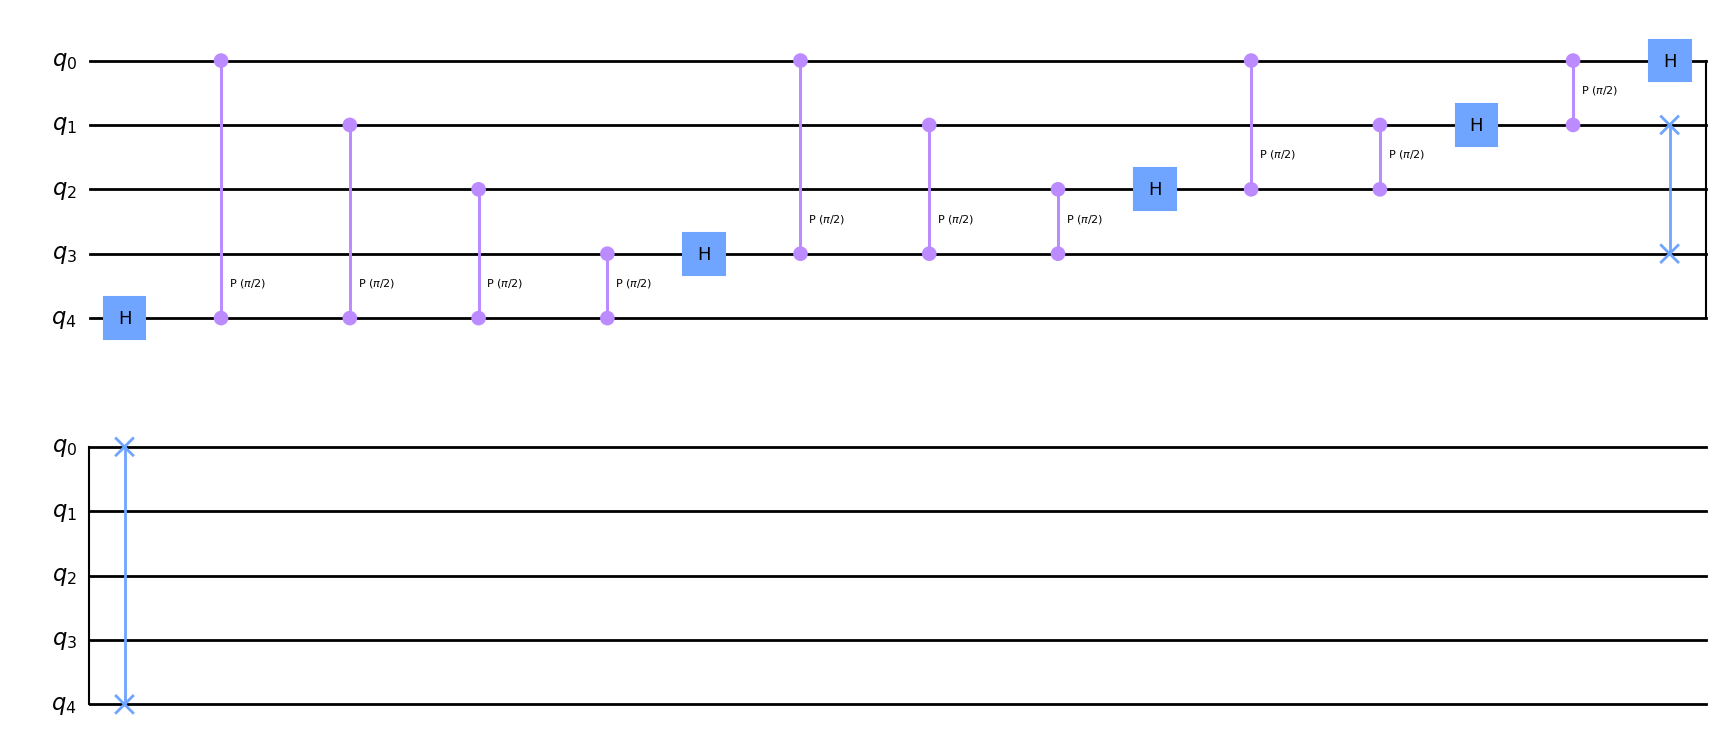

In [58]:
n=5
k=2
circuit = QuantumCircuit(n)


def myQFT(qc,n): #Performs a qft of the first n qubits of circuit
    # list maker
  allList = []
  for i in range(n):
    allList.append(i)

  # H and CCR
  for i in range(n):
    qc.h(allList[-1])
    for i in range(len(allList[0:-1])):
      qc.cp(2*np.pi/((2)**k), i, allList[-1])
    allList = allList[0:-1]
    #qc.barrier()
    if len(allList) == 0:
      break


  # swap gates
  allList2 = []
  for i in range(n):
    allList2.append(i)

  for i in range(n):
    qc.swap(allList2[0], allList2[-1])
    allList2 = allList2[1:-1]
    if len(allList2) <= 1:
      break


  return qc
myQFT(circuit, n)
circuit.draw('mpl')

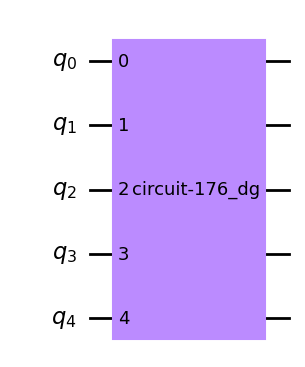

In [59]:
final = []
for i in range(n):
  final.append(i)

newgate=circuit.to_gate()
inversegate = newgate.inverse()

icircuit = QuantumCircuit(n)
icircuit.append(inversegate, final)
icircuit.draw('mpl')

#def myiQFT(qc,n): #Performs a qft of the first n qubits of circuit
    #YOUR CODE HERE
  #qc.append(inversegate)

#myiQFT(icircuit, 3)

## Quantum Addition: An Application

We can use our QFT to add the values of quantum registers together and store them in the output register.

<font size=5>Goal: $\lvert x\rangle\lvert y\rangle \xrightarrow{\text{Q-Add}} \lvert x\rangle\lvert y + x \rangle$ </font>

Remember $\mathbf{C}^{\mathbf{R}_{k}}_{i,j} =\texttt{qc.cp(}\lambda=2\pi/2^{k}\texttt{,q[i],q[j])}$

<font size=5> Plan: Apply controlled rotations to the QFT of the output register </font>

$\lvert x\rangle\lvert y\rangle = \lvert x_{1}x_{0}\rangle \lvert y_{1}y_{0}\rangle \\ $

$\lvert x_{1}x_{0}\rangle \lvert y_{1}y_{0}\rangle \xrightarrow{\text{QFT on }\lvert y\rangle} \lvert x_{1}\rangle_{3}\lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi y_{0}/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right)$

$\begin{align}
\xrightarrow{\mathbf{C}^{\mathbf{R}_{2}}_{20}}& \lvert x_{1}\rangle_{3}\lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi y_{0}/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1}\color{red}{+x_{0}/2^{2}})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
\xrightarrow{\mathbf{C}^{\mathbf{R}_{1}}_{30}}& \lvert x_{1}\rangle_{3}\lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi y_{0}/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1}\color{red}{+x_{0}/2^{2}+x_{1}/2^{1}})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
\xrightarrow{\mathbf{C}^{\mathbf{R}_{1}}_{21}}& \lvert x_{1}\rangle_{3}\lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi (y_{0}/2^{1}\color{red}{+x_{0}/2^{1}})}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1}\color{red}{+x_{0}/2^{2}+x_{1}/2^{1}})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
=&\lvert x_{1}\rangle_{3}\lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi (y_{0}+x_{0})/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi [(y_{0}+x_{0})/2^{2}+(y_{1}+x_{1})/2^{1}]}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
& \\
\xrightarrow{\text{iQFT on }\lvert y\rangle}& \lvert x \rangle\lvert y+x \text{ mod }4 \rangle
\end{align}
$

### Example with n=2 (input) and m=1 (output)

$\begin{align}
\lvert x_{1}x_{0}\rangle \lvert y_{0}\rangle &\xrightarrow{\text{QFT on }\lvert y\rangle} \lvert x_{1}\rangle_{2}\lvert x_{0}\rangle_{1} \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi y_{0}/2^{1}}} \lvert 1\rangle_{0}}{\sqrt{2}}\right)\\
&\xrightarrow{\mathbf{C}^{\mathbf{R}_{1}}_{10}} \lvert x_{1}\rangle_{2}\lvert x_{0}\rangle_{1} \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{1}\color{red}{+x_{0}/2^{1}})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right)\\
&\quad=\lvert x_{1}\rangle_{2}\lvert x_{0}\rangle_{1} \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}+x_{0})/2^{1}}} \lvert 1\rangle_{0}}{\sqrt{2}}\right)\\
&\xrightarrow{\text{iQFT}}\lvert x\rangle\lvert y+x\text{ mod 2}\rangle
\end{align}
$

### Example with n=1 (input) and m=2 (output)

$\lvert x_{0}\rangle \lvert y_{1}y_{0}\rangle \xrightarrow{\text{QFT on }\lvert y\rangle} \lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi y_{0}/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right)$

$\begin{align}
\xrightarrow{\mathbf{C}^{\mathbf{R}_{2}}_{20}}& \lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi y_{0}/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1}\color{red}{+x_{0}/2^{2}})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
\xrightarrow{\mathbf{C}^{\mathbf{R}_{1}}_{21}}& \lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi (y_{0}/2^{1}\color{red}{+x_{0}/2^{1}})}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi (y_{0}/2^{2}+y_{1}/2^{1}\color{red}{+x_{0}/2^{2}})}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
=&\lvert x_{0}\rangle_{2} \left(\frac{\lvert0\rangle_{1}+ \color{blue}{e^{i2\pi (y_{0}+x_{0})/2^{1}}} \lvert 1\rangle_{1}}{\sqrt{2}}\right) \left(\frac{\lvert0\rangle_{0}+ \color{blue}{e^{i2\pi [(y_{0}+x_{0})/2^{2}+(y_{1}+0)/2^{1}]}} \lvert 1\rangle_{0}}{\sqrt{2}}\right) \\
& \\
\xrightarrow{\text{iQFT on }\lvert y\rangle}& \lvert x \rangle\lvert y+x \text{ mod }4 \rangle
\end{align}
$

## Appendix: Derivation of QFT Gates

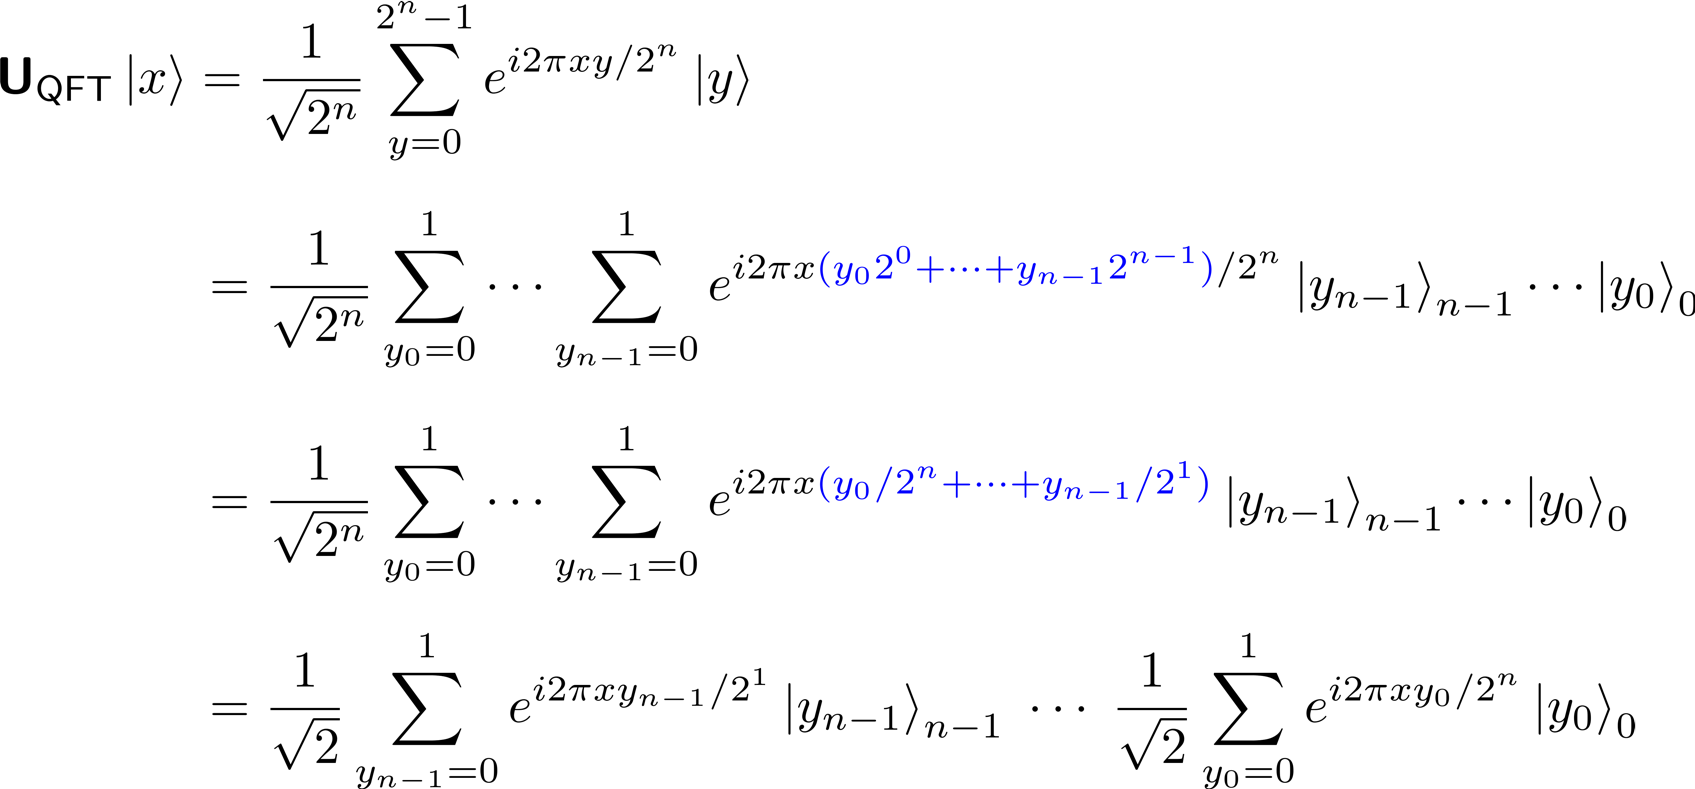

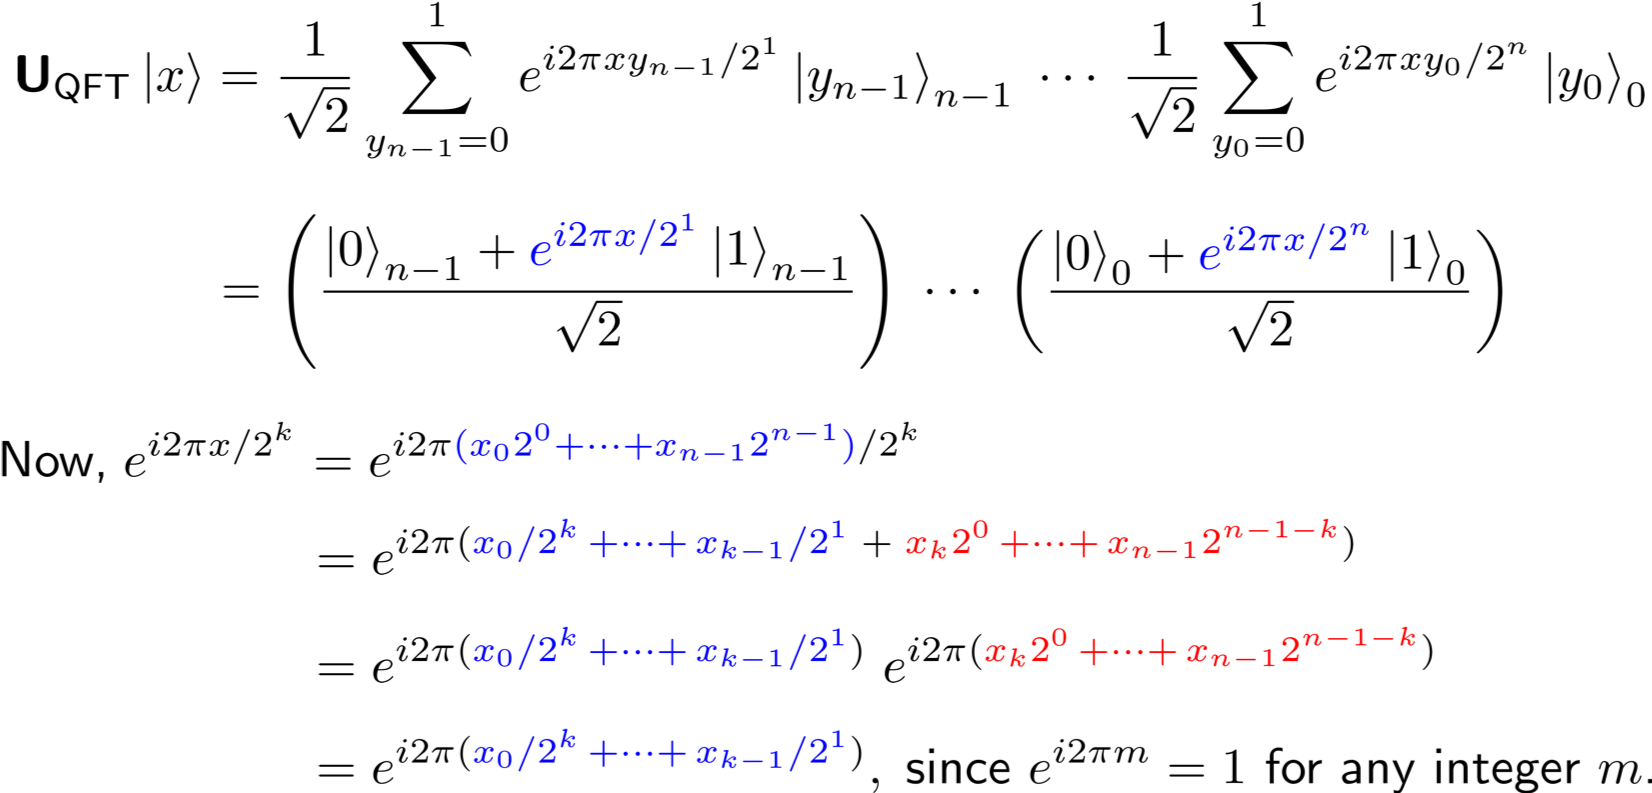

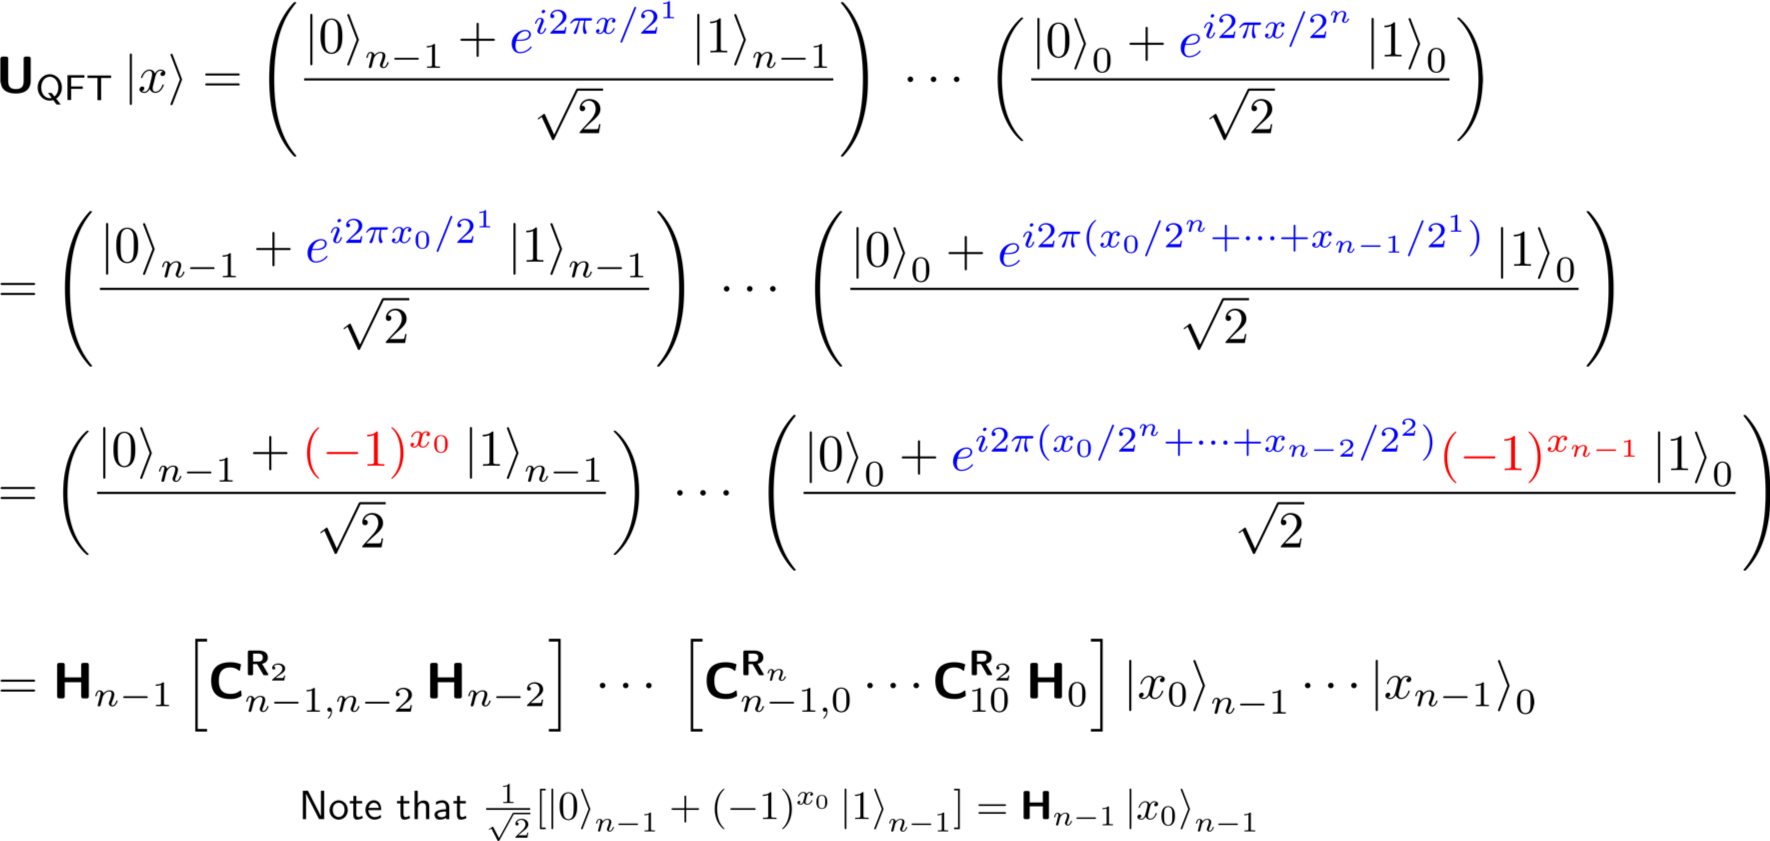

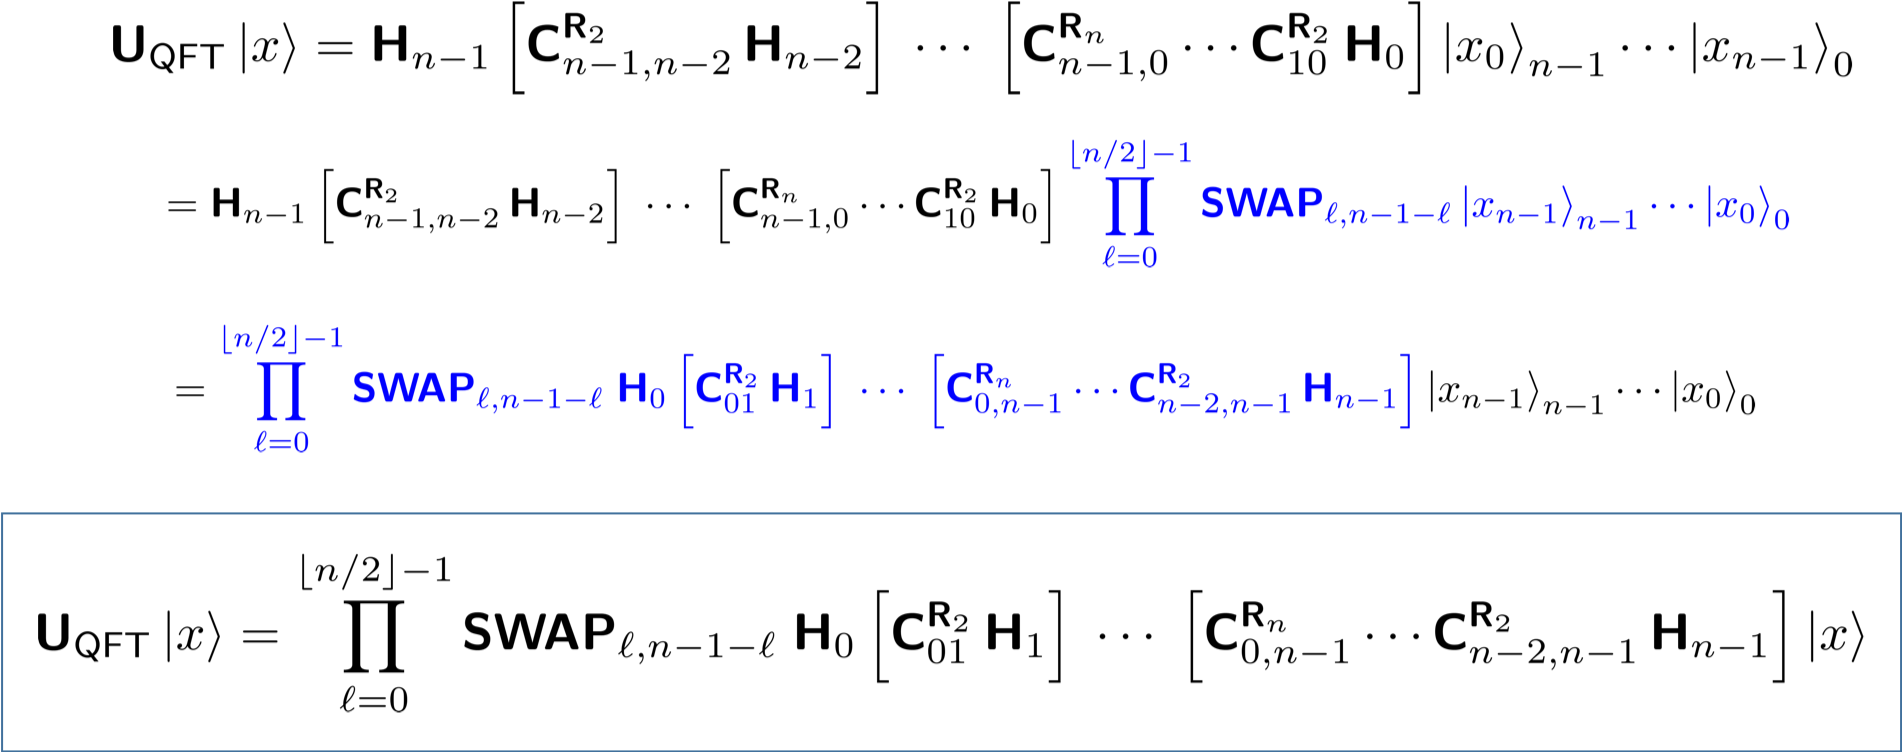